In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
from tensorflow import keras 

#Load Dataset


In [3]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()  # each image is 32*32 and 3 is RGB
X_train.shape

170508288/170498071 [==============================] - 3s 0us/step


(50000, 32, 32, 3)

In [4]:
X_test.shape


(10000, 32, 32, 3)

In [5]:
y_train.shape

(50000, 1)

In [6]:
y_train[:5] # this is 2d array , convert to 1d array
y_train.ndim

2

In [7]:
y_train = y_train.reshape(-1,)
y_train[:5]
y_train.ndim

1

In [8]:
y_test = y_test.reshape(-1,)
y_test.ndim

1

In [9]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]
# labelling all types of images

In [10]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

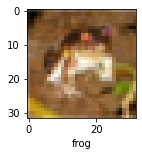

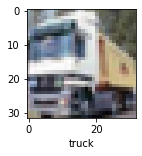

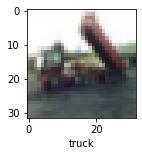

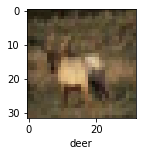

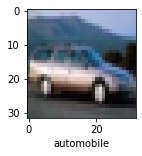

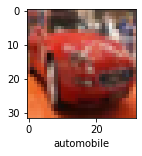

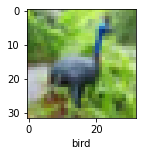

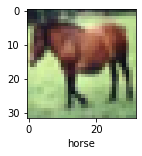

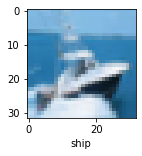

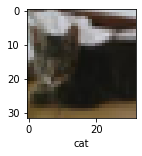

In [11]:
for i in range(10):
  plot_sample(X_train, y_train, i)

HERE we need to Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255

#NORMALIZE DATA :

In [12]:
X_train = X_train / 255.0
X_test = X_test / 255.0

#ANN MODEL CREATION

In [16]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='swish'),
        layers.Dense(1000, activation='swish'),
        layers.Dense(10, activation='softmax'),    
        layers.Dense(1000, activation='relu'),
        layers.Dense(1000, activation='swish'),
        layers.Dense(1000, activation='swish'),
        layers.Dense(1000, activation='swish'),
        
    ])

ann.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [17]:
ann.fit(X_train,y_train,epochs = 10)

Epoch 1/10
1563/1563 [==============================] - 179s 114ms/step - loss: 2.3266 - accuracy: 0.1000
Epoch 2/10
1563/1563 [==============================] - 181s 116ms/step - loss: 2.3026 - accuracy: 0.1000
Epoch 3/10
1563/1563 [==============================] - 180s 115ms/step - loss: 2.3026 - accuracy: 0.1000
Epoch 4/10
1563/1563 [==============================] - 179s 115ms/step - loss: 2.3026 - accuracy: 0.1000
Epoch 5/10
1563/1563 [==============================] - 175s 112ms/step - loss: 2.3026 - accuracy: 0.1000
Epoch 6/10
1563/1563 [==============================] - 174s 112ms/step - loss: 2.3026 - accuracy: 0.1000
Epoch 7/10
1563/1563 [==============================] - 171s 110ms/step - loss: 2.3026 - accuracy: 0.1000
Epoch 8/10
1563/1563 [==============================] - 169s 108ms/step - loss: 2.3026 - accuracy: 0.1000
Epoch 9/10
1563/1563 [==============================] - 211s 135ms/step - loss: 2.3026 - accuracy: 0.1000
Epoch 10/10
1563/1563 [=======================

#TRAIN/FIT THE MODEL:

In [18]:
y_pred = ann.predict(X_test)
y_pred

array([[ 1.3050857 ,  1.149883  ,  1.601179  , ..., -0.14464371,
        -0.06333926, -0.08399443],
       [ 1.3050857 ,  1.149883  ,  1.601179  , ..., -0.14464371,
        -0.06333926, -0.08399443],
       [ 1.3050857 ,  1.149883  ,  1.601179  , ..., -0.14464371,
        -0.06333926, -0.08399443],
       ...,
       [ 1.3050857 ,  1.149883  ,  1.601179  , ..., -0.14464371,
        -0.06333926, -0.08399443],
       [ 1.3050857 ,  1.149883  ,  1.601179  , ..., -0.14464371,
        -0.06333926, -0.08399443],
       [ 1.3050857 ,  1.149883  ,  1.601179  , ..., -0.14464371,
        -0.06333926, -0.08399443]], dtype=float32)

In [19]:
y_test

array([3, 8, 8, ..., 5, 1, 7], dtype=uint8)

In [20]:
ann.evaluate(X_test ,y_test)

313/313 [==============================] - 10s 32ms/step - loss: 2.3026 - accuracy: 0.1000


[2.302595853805542, 0.10000000149011612]

Now let us build a convolutional neural network to train our images (extras)

In [12]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [13]:
cnn.fit(X_train, y_train, epochs=10)


Epoch 1/10
1563/1563 [==============================] - 62s 39ms/step - loss: 1.7733 - accuracy: 0.4026
Epoch 2/10
1563/1563 [==============================] - 61s 39ms/step - loss: 1.2542 - accuracy: 0.5610
Epoch 3/10
1563/1563 [==============================] - 59s 38ms/step - loss: 1.1106 - accuracy: 0.6101
Epoch 4/10
1563/1563 [==============================] - 59s 37ms/step - loss: 1.0120 - accuracy: 0.6479
Epoch 5/10
1563/1563 [==============================] - 63s 41ms/step - loss: 0.9225 - accuracy: 0.6808
Epoch 6/10
1563/1563 [==============================] - 60s 39ms/step - loss: 0.8582 - accuracy: 0.7022
Epoch 7/10
1563/1563 [==============================] - 60s 38ms/step - loss: 0.7987 - accuracy: 0.7234
Epoch 8/10
1563/1563 [==============================] - 61s 39ms/step - loss: 0.7522 - accuracy: 0.7383
Epoch 9/10
1563/1563 [==============================] - 59s 38ms/step - loss: 0.7157 - accuracy: 0.7519
Epoch 10/10
1563/1563 [==============================] - 60s 38m

In [ ]:
cnn.evaluate(X_test,y_test)


With CNN, at the end 5 epochs, accuracy was at around 76% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN

In [14]:
y_pred = cnn.predict(X_test)
y_pred

array([[0.02139858, 0.034531  , 0.13419446, ..., 0.03255856, 0.04542467,
        0.02752255],
       [0.0222854 , 0.03524204, 0.1419113 , ..., 0.03268747, 0.04555802,
        0.02690777],
       [0.0209763 , 0.03405787, 0.13918112, ..., 0.03151852, 0.04354709,
        0.02746644],
       ...,
       [0.022531  , 0.0357602 , 0.13595608, ..., 0.03561651, 0.04593753,
        0.02757266],
       [0.02039201, 0.03360437, 0.13901454, ..., 0.03281258, 0.04076219,
        0.02765231],
       [0.02136132, 0.0341872 , 0.13949968, ..., 0.03370158, 0.04226653,
        0.02716677]], dtype=float32)

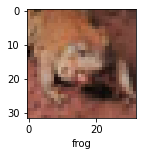

In [15]:
plot_sample(X_test, y_test,5)